## Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [57]:
from PIL import Image

In [58]:

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Preparing the Data


In [59]:
data = np.zeros((400, 10304))

Data = np.zeros((400,10304))
cnt=0
paths = ["data/s"+str(i) for i in range(1,41)]
# looping through the paths and adding flattened images (row matrices) to the Data matrix
for path in paths:
    files = os.listdir(path)
    for file in files:
        img = Image.open(path + "/" + file)
        np_img = np.array(img)
        np_img = np_img.flatten()
        Data[cnt]=np_img
        cnt+=1

# creating the labels vector
labels = np.zeros((400,1))
for i in range(1,41):
    labels[(i-1)*10:i*10] = i

# creating the training set and test set
# syntax explanation : matrix[beginning:end:step]
training_set = Data[0:400:2]
test_set = Data[1:400:2]

# creating the training labels and test labels
training_labels = labels[0:400:2]
test_labels = labels[1:400:2]

print(training_set.shape)
print(test_set.shape)
print(training_labels.shape)
print(test_labels.shape)

(200, 10304)
(200, 10304)
(200, 1)
(200, 1)


In [60]:
cnt = 0
paths = ["data/s"+str(i) for i in range(1,41)]
# looping through the paths and adding flattened images (row matrices) to the Data matrix
for path in paths:
    files = os.listdir(path)
    for file in files:
        img = Image.open(path + "/" + file)
        np_img = np.array(img)
        np_img = np_img.flatten()
        data[cnt]=np_img
        cnt+=1

In [61]:
data

array([[ 41.,  47.,  47., ...,  35.,  37.,  38.],
       [ 43.,  50.,  41., ..., 158., 153., 169.],
       [ 63.,  53.,  35., ...,  41.,  10.,  24.],
       ...,
       [125., 119., 124., ...,  36.,  39.,  40.],
       [119., 120., 120., ...,  89.,  94.,  85.],
       [125., 124., 124., ...,  36.,  35.,  34.]])

### Creating the label Vector

In [62]:
data.shape

(400, 10304)

In [63]:
# creating the labels vector
labels = np.zeros((400,1))
for i in range(1,41):
    labels[(i-1)*10:i*10] = i

### Creating the training and Test Set


## Data Representation

### Raw Data

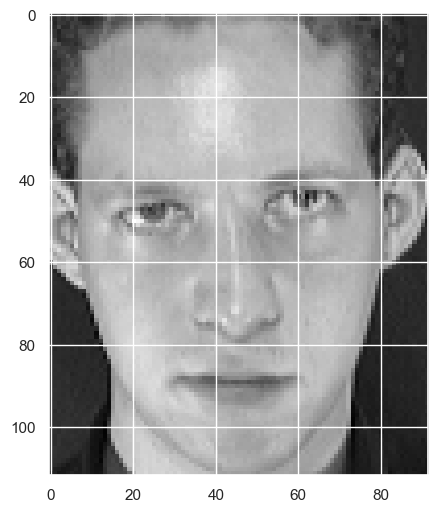

In [64]:
plt.imshow(training_set[3].reshape(112,92),cmap='gray')
plt.show()

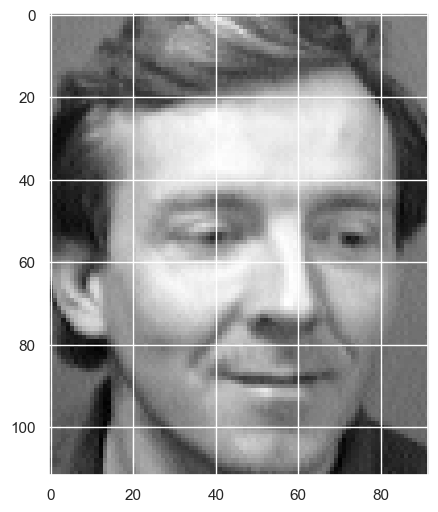

In [65]:
plt.imshow(training_set[13].reshape(112,92),cmap='gray')
plt.show()

### PCA Algorithm

In [66]:
X = data / 112.0
pca = PCA()
pca.fit(X)

PCA()

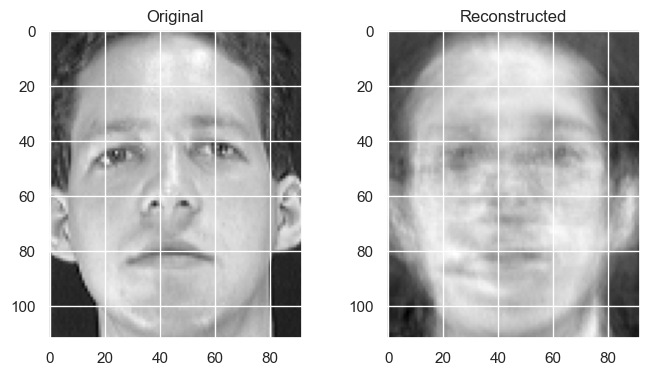

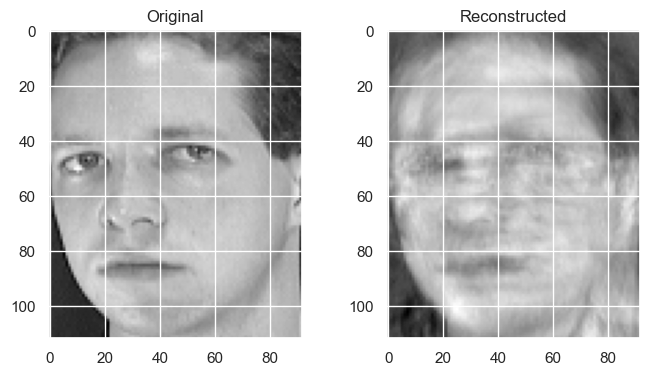

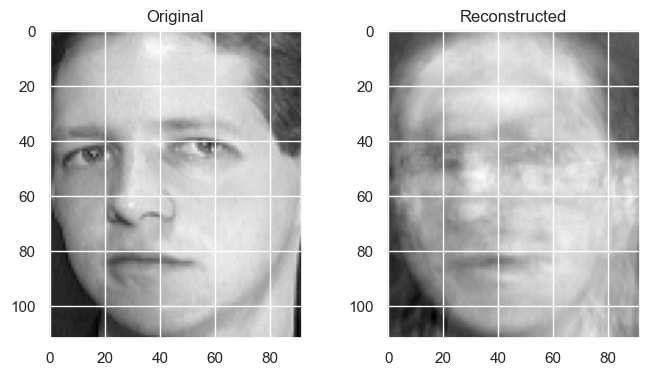

In [67]:

pca = PCA(n_components=50)
transformed_dataset = pca.fit_transform(data)

# Reconstruct images from the transformed dataset
reconstructed_dataset = pca.inverse_transform(transformed_dataset)

# Plot original and reconstructed images
num_images = 3
for i in range(num_images):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(data[i].reshape(112, 92), cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(reconstructed_dataset[i].reshape(112, 92), cmap='gray')
    axs[1].set_title('Reconstructed')
    plt.show()

### kPCA

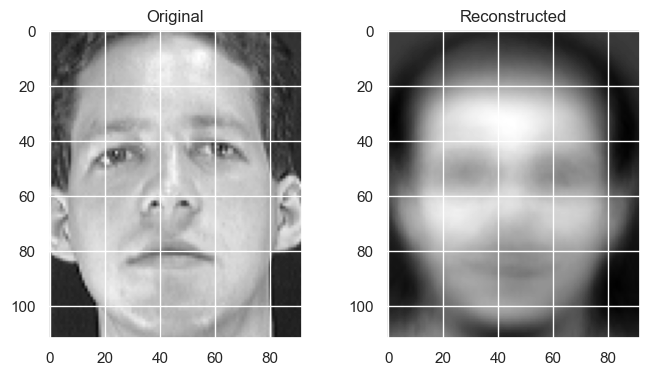

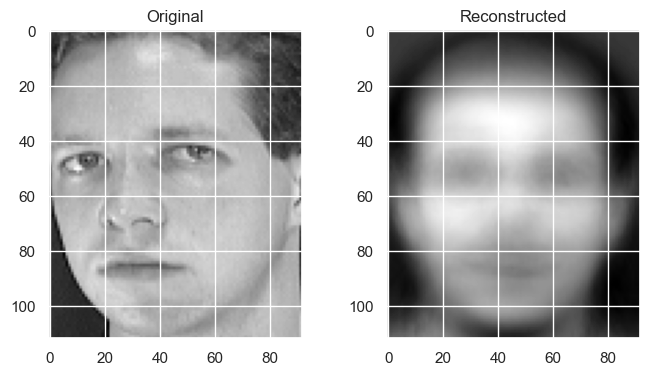

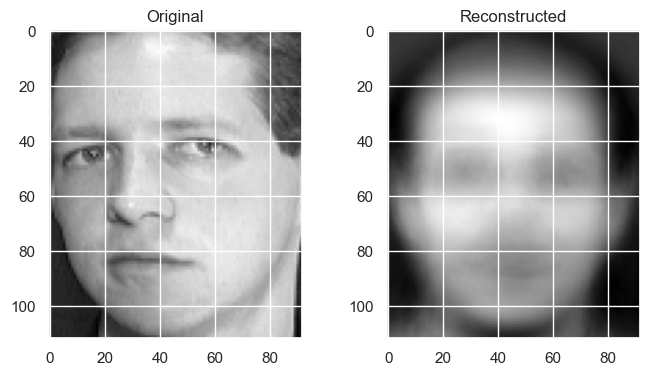

In [68]:

# Apply kPCA to the dataset
kpca = KernelPCA(n_components=50, kernel='rbf', fit_inverse_transform=True)
transformed_dataset = kpca.fit_transform(data)

# Reconstruct images from the transformed dataset
reconstructed_dataset = kpca.inverse_transform(transformed_dataset)

# Plot original and reconstructed images
num_images = 3
for i in range(num_images):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(data[i].reshape(112, 92), cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(reconstructed_dataset[i].reshape(112, 92), cmap='gray')
    axs[1].set_title('Reconstructed')
    plt.show()

### LDA

Finished computing eigenvalues and eigenvectors for the LDA


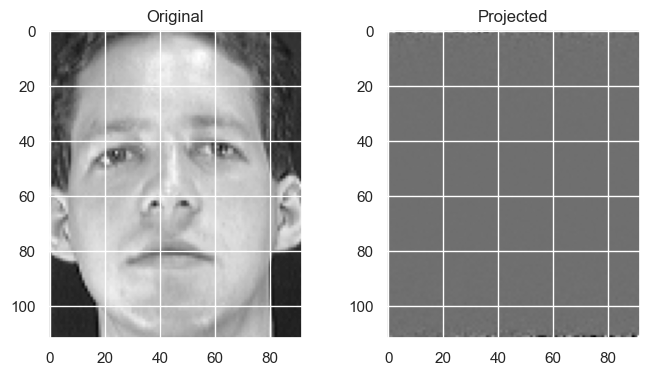

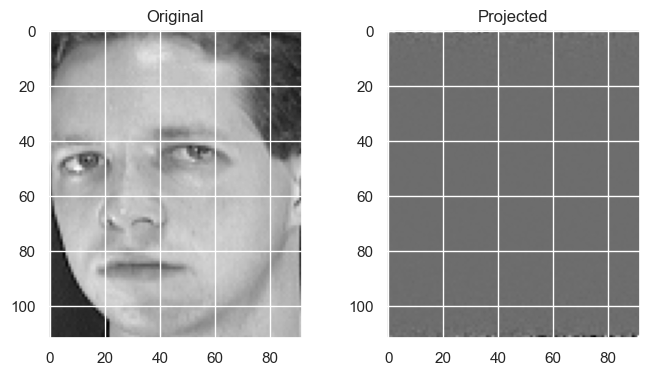

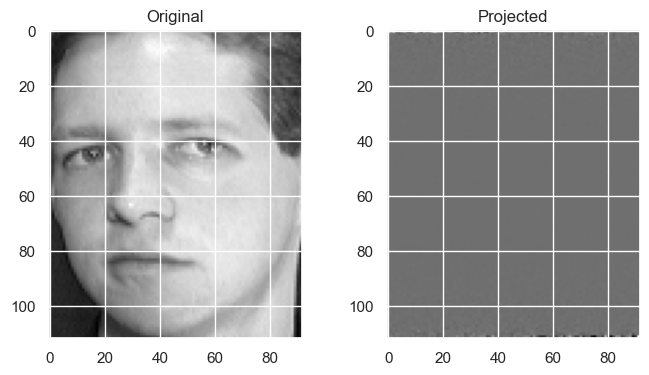

In [69]:
# This is a multi-class LDA classifier for face recognition
def LDA(training_set):
    overall_mean = np.mean(training_set, axis=0).reshape(10304,1)
    # Computing the between-class scatter matrix
    S_B = np.zeros((10304,10304))
    S_W = np.zeros((10304,10304))
    for i in range(1,41):
        class_mean = np.mean(training_set[(i-1)*5:i*5], axis=0)
        class_mean = class_mean.reshape(10304,1)
        S_B += 5 * np.dot((class_mean - overall_mean), (class_mean - overall_mean).T)
        centered_data = training_set[(i-1)*5:i*5] - np.mean(training_set[(i-1)*5:i*5], axis=0)
        S_W += np.dot(centered_data.T, centered_data)
    # Computing the eigenvalues and eigenvectors of the generalized eigenvalue problem
    eigenvalues, eigenvectors = np.linalg.eigh(np.linalg.inv(S_W).dot(S_B))
    print("Finished computing eigenvalues and eigenvectors for the LDA")
    
    positions = eigenvalues.argsort()[::-1]
    sorted_eigenvalues = (eigenvalues[positions])
    sorted_eigenvectors = (eigenvectors[:,positions])
    # Taking only the dominant eigenvectors
    new_space = sorted_eigenvectors[:, :]
    return sorted_eigenvectors


new_space = LDA(data)
# Project the test set onto the new space
projected_test_set = np.dot(data, new_space)

# Plot the projected test images
num_images = 3
for i in range(num_images):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(data[i].reshape(112, 92), cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(projected_test_set[i].reshape(112, 92), cmap='gray')
    axs[1].set_title('Projected')
    plt.show()

    

    

## Classification

In [70]:
# Assuming you have a dataset of images in X and their corresponding labels in y
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(data, labels, test_size=0.5, stratify=labels)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(data, labels, test_size=0.3, stratify=labels)

print(X_train_50.shape)
print(X_train_70.shape)

(200, 10304)
(280, 10304)


In [71]:
def KNN (X_train, y_train, X_test, y_test) :
    accuracies = []
    for k in range(1, 6):
        # Train a KNN classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Evaluate the classifier on the test set
        y_pred = knn.predict(X_test)
        accuracy = knn.score(X_test, y_test)
        accuracies.append(accuracy)
        print(f"k = {k}, accuracy = {accuracy}")
        # if k == 1 : print(classification_report(y_test, y_pred))

    # Plot the accuracies for different values of k
    plt.plot(range(1, 6), accuracies)
    plt.title("Accuracy vs. K")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.show()

### Raw Data


k = 1, accuracy = 0.95
k = 2, accuracy = 0.88
k = 3, accuracy = 0.895
k = 4, accuracy = 0.875
k = 5, accuracy = 0.805


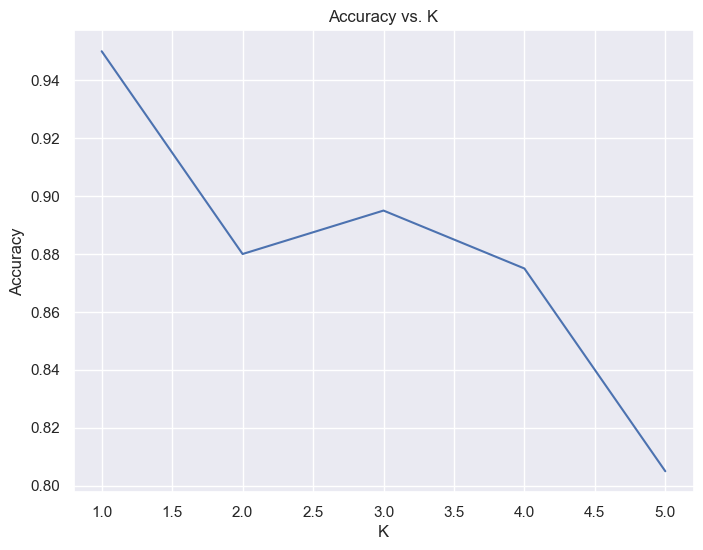

In [72]:
KNN(X_train_50,y_train_50, X_test_50, y_test_50 )

k = 1, accuracy = 0.9916666666666667
k = 2, accuracy = 0.9333333333333333
k = 3, accuracy = 0.9583333333333334
k = 4, accuracy = 0.9083333333333333
k = 5, accuracy = 0.8916666666666667


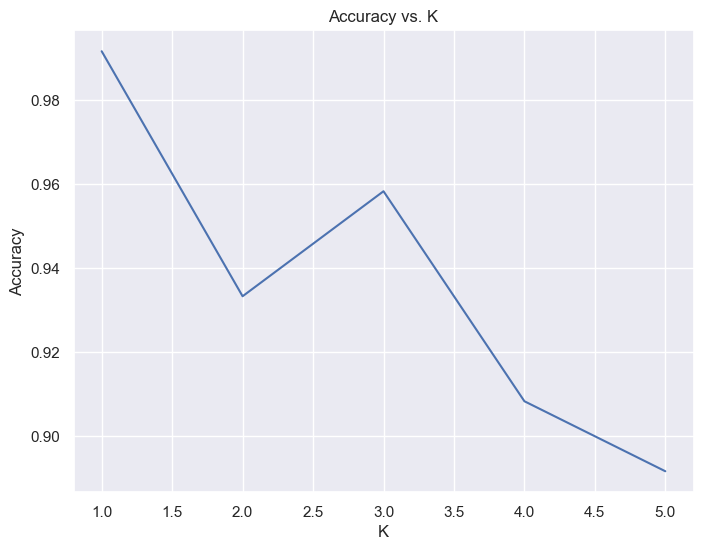

In [73]:
KNN(X_train_70,y_train_70, X_test_70, y_test_70 )

### PCA

In [74]:
def data_processing(training_set, test_set):
    # Compute means and center the data
    means = np.mean(training_set, axis=0, keepdims=True)
    centered_training_set = training_set - means
    centered_test_set = test_set - means

    # Compute covariance matrix and its eigendecomposition
    covariance_matrix = np.cov(centered_training_set, rowvar=False, bias=True)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors and eigenvalues in descending order of eigenvalues
    indices = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]

    return eigenvalues, eigenvectors, centered_training_set, centered_test_set


In [75]:
def get_pca(eigenvalues,eigenvectors, alpha):
    total = sum(eigenvalues)
    r = 0
    current_sum = 0
    while current_sum/total < alpha:
        current_sum += eigenvalues[r]
        r += 1
    new_space = eigenvectors[:, :r]    
    return new_space,r

In [76]:
sorted_eigenvalues, sorted_eigenvectors, centered_training_set, centered_test_set = data_processing(training_set, test_set)


In [77]:
sorted_eigenvalues_70, sorted_eigenvectors_70, centered_training_set_70, centered_test_set_70 = data_processing(X_train_70, X_test_70)


In [78]:
def knn_pca (training_set,test_set, training_labels, test_labels) :
    alpha = [0.1, 0.2, 0.3, 0.4, 0.7, 0.72, 0.8 ,0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]
    scores = []
    pcs = np.zeros((len(alpha), 1))
    cnt = 0

    for i in alpha:
        pca = PCA(n_components=i)
        new_space = pca.fit_transform(training_set)
        pcs[cnt] = pca.n_components_
        new_training_set = pca.transform(training_set)
        new_test_set = pca.transform(test_set)

        # Use kNN classifier
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(new_training_set, training_labels.ravel())
        scores.append(knn.score(new_test_set, test_labels.ravel()))
        cnt += 1
    return scores, pcs     

In [79]:
scores_50,pcs_50 = knn_pca(centered_training_set,centered_test_set, training_labels, test_labels)
scores_50

[0.125,
 0.42,
 0.42,
 0.785,
 0.94,
 0.945,
 0.96,
 0.97,
 0.975,
 0.97,
 0.965,
 0.965,
 0.965,
 0.97]

In [80]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.7, 0.72, 0.8 ,0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]

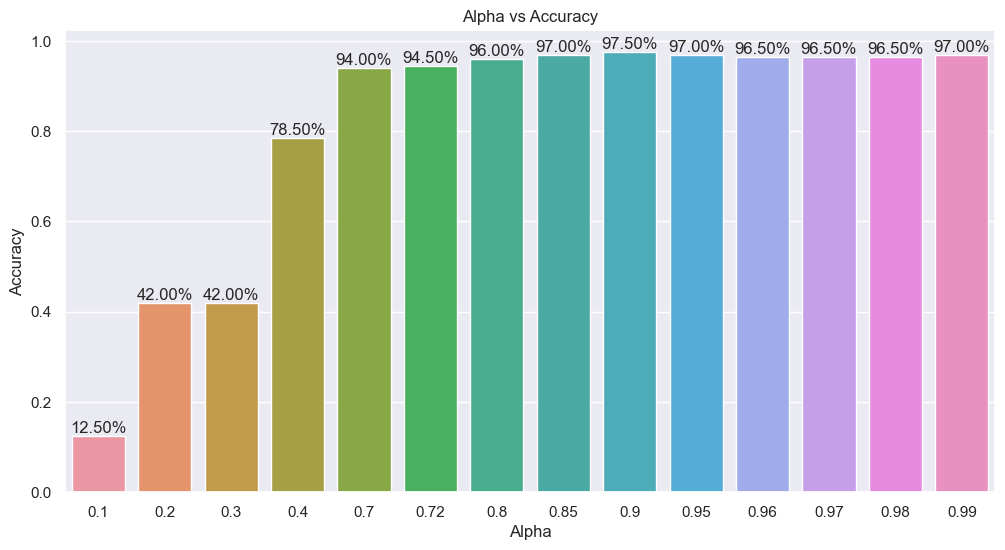

In [81]:
plt.figure(figsize=(12, 6))
# create the barplot
ax = sns.barplot(x=alpha, y=scores_50)

# add labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Alpha vs Accuracy')

# add percentage values above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{h.get_height()*100:.2f}%' for h in i])

# show the plot
plt.show()

In [82]:
y_train_70.shape

(280, 1)

In [83]:
scores_70, pcs_70 = knn_pca(centered_training_set_70,centered_test_set_70, y_train_70, y_test_70)
scores_70

[0.08333333333333333,
 0.425,
 0.425,
 0.8416666666666667,
 0.9833333333333333,
 0.9916666666666667,
 1.0,
 1.0,
 1.0,
 0.9916666666666667,
 0.9916666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9916666666666667]

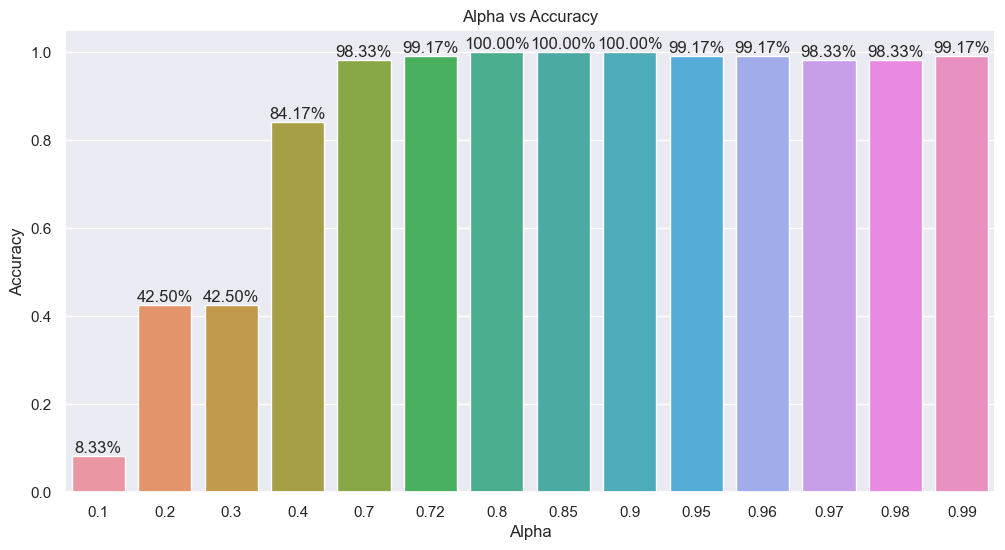

In [84]:
plt.figure(figsize=(12, 6))
# create the barplot
ax = sns.barplot(x=alpha, y=scores_70)

# add labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Alpha vs Accuracy')

# add percentage values above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{h.get_height()*100:.2f}%' for h in i])

# show the plot
plt.show()

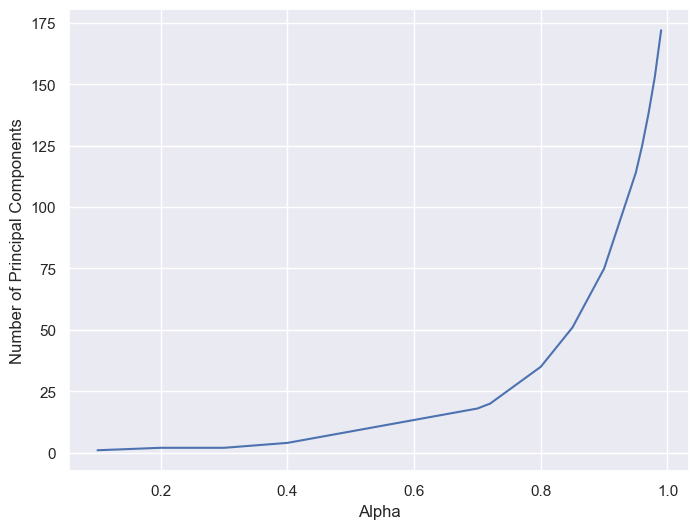

[  1.   2.   2.   4.  18.  20.  35.  51.  75. 114. 125. 138. 153. 172.]


In [85]:
plt.plot(alpha, pcs_50)
plt.ylabel("Number of Principal Components")
plt.xlabel("Alpha")
plt.show()
print(pcs_50.ravel())


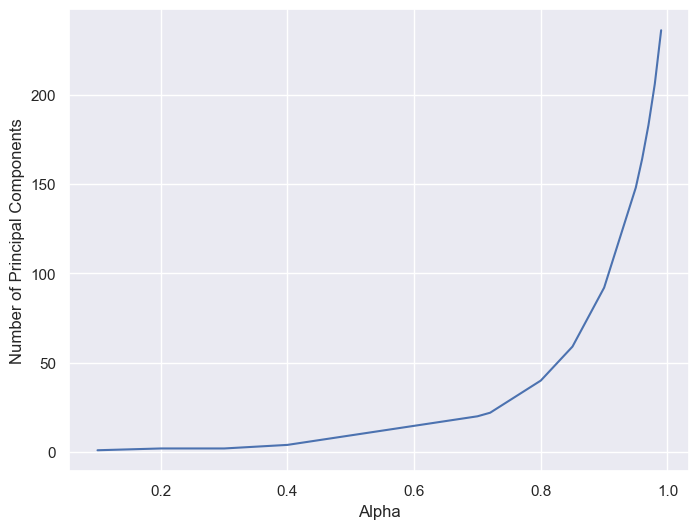

[  1.   2.   2.   4.  20.  22.  40.  59.  92. 148. 164. 183. 206. 236.]


In [86]:
plt.plot(alpha, pcs_70)
plt.ylabel("Number of Principal Components")
plt.xlabel("Alpha")
plt.show()
print(pcs_70.ravel())

### kPCA

In [87]:
def kPCA (n_components, kernal,training_set,test_set , training_labels , test_labels) : 
    kpca = KernelPCA(n_components=n_components, kernel=kernal)
    kpca.fit(training_set)
    new_training_set = kpca.transform(training_set)
    new_test_set = kpca.transform(test_set)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(new_training_set, training_labels.ravel())
    acc = knn.score(new_test_set, test_labels.ravel())
    return acc

In [88]:
n_components = [50, 70, 90, 100, 150, 172]
kernals = ['linear', 'poly', 'rbf', 'sigmoid']

results = pd.DataFrame(columns=['n_components', 'kernal', 'accuracy_50'])

for n in n_components:
    for k in kernals:
        accuracy = kPCA(n, k, training_set, test_set, training_labels, test_labels)
        results = results.append({'n_components': n, 'kernal': k, 'accuracy_50': accuracy}, ignore_index=True)


In [89]:
results

,n_components,kernal,accuracy_50
0,50,linear,0.970
1,50,poly,0.960
2,50,rbf,0.025
3,50,sigmoid,0.025
4,70,linear,0.970
5,70,poly,0.970
6,70,rbf,0.025
7,70,sigmoid,0.025
8,90,linear,0.970
9,90,poly,0.970


In [90]:
n_components = [50, 70, 90, 100, 150, 172, 180, 200, 220, 236]

results_70 = pd.DataFrame(columns=['n_components', 'kernal', 'accuracy_70'])

for n in n_components:
    for k in kernals:
        accuracy = kPCA(n, k, X_train_70, X_test_70, y_train_70, y_test_70)
        results_70 = results_70.append({'n_components': n, 'kernal': k, 'accuracy_70': accuracy}, ignore_index=True)

In [91]:
results_70

,n_components,kernal,accuracy_70
0,50,linear,1.000000
1,50,poly,0.983333
2,50,rbf,0.025000
3,50,sigmoid,0.025000
4,70,linear,1.000000
5,70,poly,0.991667
6,70,rbf,0.025000
7,70,sigmoid,0.025000
8,90,linear,1.000000
9,90,poly,0.991667


In [92]:
results['accuracy_70'] = results_70['accuracy_70'].copy()

In [93]:
results

,n_components,kernal,accuracy_50,accuracy_70
0,50,linear,0.970,1.000000
1,50,poly,0.960,0.983333
2,50,rbf,0.025,0.025000
3,50,sigmoid,0.025,0.025000
4,70,linear,0.970,1.000000
5,70,poly,0.970,0.991667
6,70,rbf,0.025,0.025000
7,70,sigmoid,0.025,0.025000
8,90,linear,0.970,1.000000
9,90,poly,0.970,0.991667


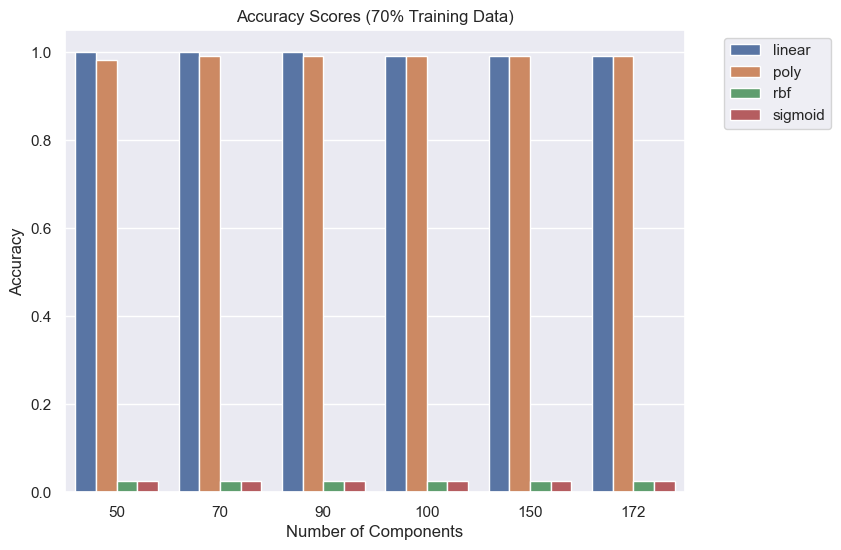

In [94]:
plt.figure(figsize=(8, 6))
# Create a barplot to compare the accuracy scores for different values of n_components and kernel
sns.barplot(data=results, x='n_components', y='accuracy_70', hue='kernal')
plt.title('Accuracy Scores (70% Training Data)')
plt.ylabel('Accuracy')
plt.xlabel('Number of Components')
# Move legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

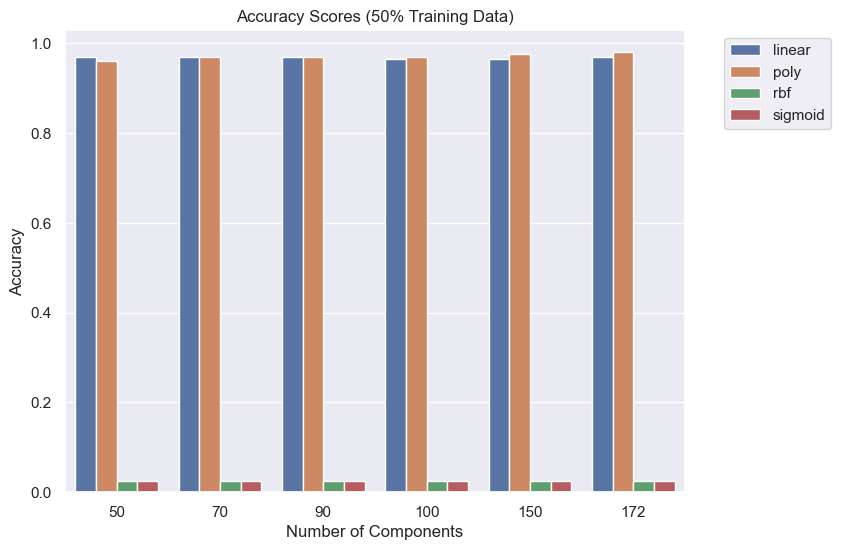

In [95]:

plt.figure(figsize=(8, 6))
# Create a barplot to compare the accuracy scores for different values of n_components and kernel
sns.barplot(data=results, x='n_components', y='accuracy_50', hue='kernal')
plt.title('Accuracy Scores (50% Training Data)')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Number of Components')
plt.show()

## LDA

In [96]:
# This is a multi-class LDA classifier for face recognition
def LDA(training_set):
    overall_mean = np.mean(training_set, axis=0).reshape(10304,1)
    # Computing the between-class scatter matrix
    S_B = np.zeros((10304,10304))
    S_W = np.zeros((10304,10304))
    for i in range(1,41):
        class_mean = np.mean(training_set[(i-1)*5:i*5], axis=0)
        class_mean = class_mean.reshape(10304,1)
        S_B += 5 * np.dot((class_mean - overall_mean), (class_mean - overall_mean).T)
        centered_data = training_set[(i-1)*5:i*5] - np.mean(training_set[(i-1)*5:i*5], axis=0)
        S_W += np.dot(centered_data.T, centered_data)
    # Computing the eigenvalues and eigenvectors of the generalized eigenvalue problem
    eigenvalues, eigenvectors = np.linalg.eigh(np.linalg.inv(S_W).dot(S_B))
    print("Finished computing eigenvalues and eigenvectors for the LDA")
    
    positions = eigenvalues.argsort()[::-1]
    sorted_eigenvalues = (eigenvalues[positions])
    sorted_eigenvectors = (eigenvectors[:,positions])
    # Taking only the dominant eigenvectors
    
    return sorted_eigenvectors

In [97]:
new_space = LDA(X_train_50)

Finished computing eigenvalues and eigenvectors for the LDA


In [98]:
new_space_70 = LDA(X_train_70)

Finished computing eigenvalues and eigenvectors for the LDA


In [99]:
new_space.shape

(10304, 10304)

In [100]:
eigen_vectors = [10, 40, 80, 100, 200, 250, 300, 500, 800, 1000 , 2000, 4000, 8000, 10000, 10300]
results_50 = pd.DataFrame(columns=['dominant_eigen_vector', 'accuracy_50'])

for i in eigen_vectors :
    X_pro = new_space[:, :i]
    new_training_set = np.dot(training_set, X_pro)
    new_test_set = np.dot(test_set, X_pro)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(new_training_set, training_labels.ravel())
    accuracy =  knn.score(new_test_set, test_labels.ravel())
    results_50 = results_50.append({'dominant_eigen_vector': i,'accuracy_50': accuracy}, ignore_index=True)


results_50

,dominant_eigen_vector,accuracy_50
0,10.0,0.835
1,40.0,0.940
2,80.0,0.965
3,100.0,0.960
4,200.0,0.965
5,250.0,0.965
6,300.0,0.960
7,500.0,0.960
8,800.0,0.970
9,1000.0,0.975


In [101]:
eigen_vectors = [10, 40, 80, 100, 200, 250, 300, 500, 800, 1000 , 2000, 4000, 8000, 10000, 10300]
results_70 = pd.DataFrame(columns=['dominant_eigen_vector', 'accuracy_70'])

for i in eigen_vectors :
    X_pro = new_space_70[:, :i]
    new_training_set = np.dot(X_train_70, X_pro)
    new_test_set = np.dot(X_test_70, X_pro)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(new_training_set, y_train_70.ravel())
    accuracy =  knn.score(new_test_set, y_test_70.ravel())
    results_70 = results_70.append({'dominant_eigen_vector': i,'accuracy_70': accuracy}, ignore_index=True)

In [102]:
results_50['accuracy_70'] = results_70['accuracy_70'].copy()

In [103]:
results_50

,dominant_eigen_vector,accuracy_50,accuracy_70
0,10.0,0.835,0.891667
1,40.0,0.940,0.991667
2,80.0,0.965,0.991667
3,100.0,0.960,0.991667
4,200.0,0.965,0.991667
5,250.0,0.965,0.991667
6,300.0,0.960,0.991667
7,500.0,0.960,1.000000
8,800.0,0.970,1.000000
9,1000.0,0.975,0.991667


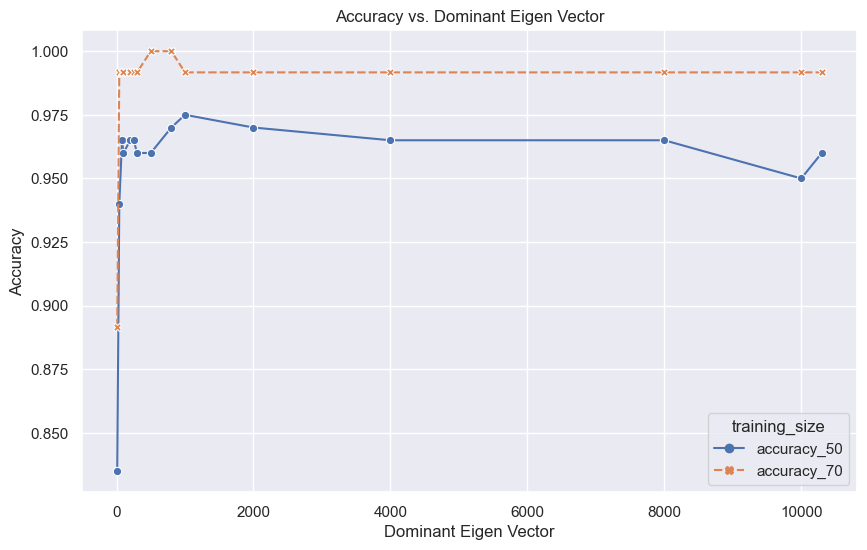

In [104]:
# Melt the DataFrame to plot the accuracy for different training sizes in the same plot
df_results_melt = pd.melt(results_50, id_vars=['dominant_eigen_vector'], value_vars=['accuracy_50', 'accuracy_70'], var_name='training_size', value_name='accuracy')

# Create a line plot using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=df_results_melt, x='dominant_eigen_vector', y='accuracy', hue='training_size', style='training_size', markers=True)
plt.title('Accuracy vs. Dominant Eigen Vector')
plt.xlabel('Dominant Eigen Vector')
plt.ylabel('Accuracy')
plt.show()

## Conclusion

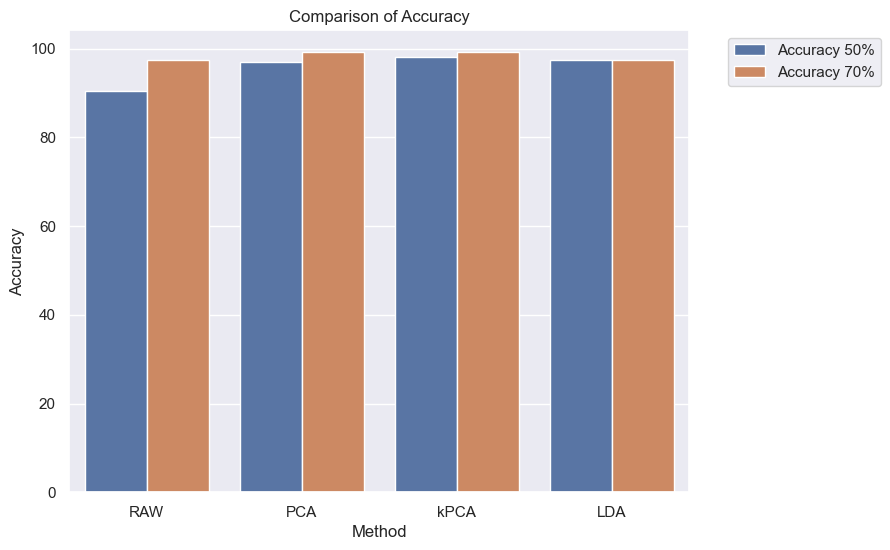

In [105]:
data = {
    'Method': ['RAW', 'PCA', 'kPCA', 'LDA'],
    'Accuracy 50%': [90.5, 97.0, 98.0, 97.5],
    'Accuracy 70%': [97.5, 99.17, 99.16, 97.5]
}

sns.set(style="whitegrid")
sns.set_palette("colorblind")
sns.set(rc={"figure.figsize":(8, 6)})

df = pd.DataFrame(data)
df = pd.melt(df, id_vars=["Method"], var_name="Accuracy")

sns.barplot(x="Method", y="value", hue="Accuracy", data=df)
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()